In [1]:
import matplotlib.pyplot as plt
#import OpenEphys as oe
import numpy as np#
import pandas as pd
import os
% matplotlib notebook


In [6]:
working_directory = r"D:\Work\Recordings\DATA\Neuropixel\190719\2019-07-19_10-04-20\experiment1\recording1\events\Neuropix-PXI-100.0"   
path = os.path.join(working_directory,'TTL_1')#'experiment1/recording1/events/Neuropix-PXI-101.0/TTL_1')

#start1 = 41339893
start2 = 0

In [9]:
channel_states = np.load(os.path.join(path,'channel_states.npy'))
timestamps = np.load(os.path.join(path,'timestamps.npy')) - start2
channels = np.load(os.path.join(path,'channels.npy'))
words = np.load(os.path.join(path,'full_words.npy'))

<IPython.core.display.Javascript object>


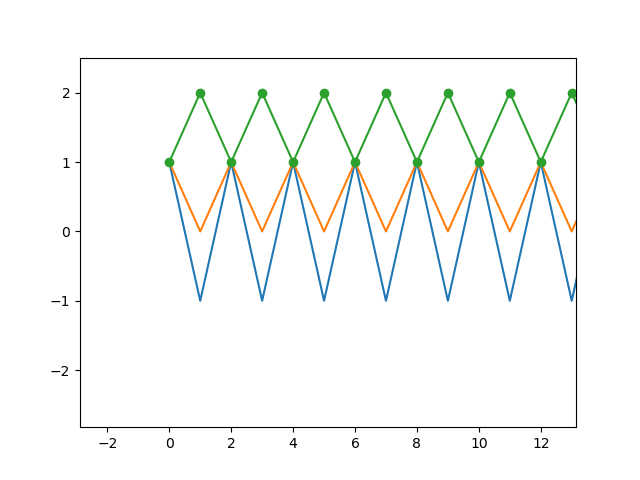

In [13]:
plt.plot(channel_states)
plt.plot(words)
plt.show()

In [14]:
timestamps_on = (timestamps[channel_states==1])/30000
timestamps_off = (timestamps[channel_states==-1])/30000


<IPython.core.display.Javascript object>


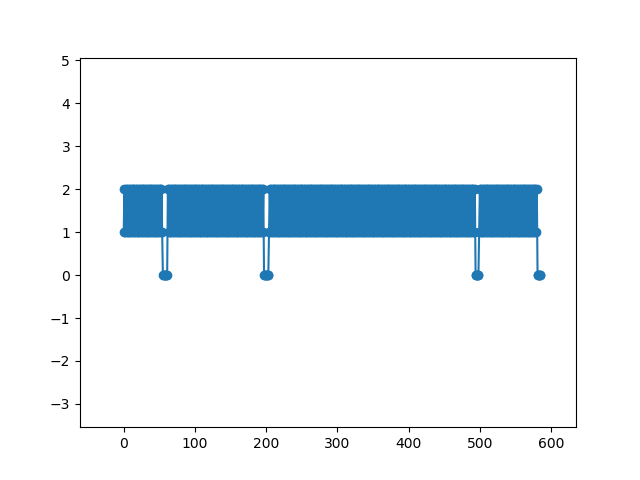

In [16]:
plt.plot((timestamps_off[:]-timestamps_on[:]),'-o')
#plt.plot((timestamps_on[:]-timestamps_on[0]),'-o')
plt.show()

In [20]:
timestamps_pattern = timestamps_off[:]-timestamps_on[:]
drops = np.where(timestamps_pattern<0.5)[0]

In [21]:
def clean_up_ian(timestamps, fail = None):
    
    if fail != None:
        timestamps = np.delete(timestamps, [fail])
        plt.plot(np.diff(timestamps),'o-')
        #plt.plot((timestamps-timestamps[0]),'o-')
        plt.show()
        
    else:
        plt.plot(np.diff(timestamps),'o-')
        #plt.plot((timestamps-timestamps[0]),'o-')
        plt.show()
    return  timestamps

In [71]:
timestamps_on = timestamps_on[:]

<IPython.core.display.Javascript object>


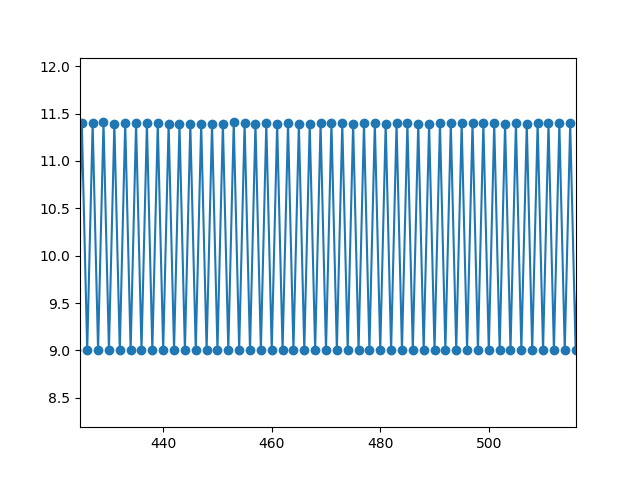

In [24]:
timestamps_on = clean_up_ian(timestamps_on[:], fail = None)

<IPython.core.display.Javascript object>


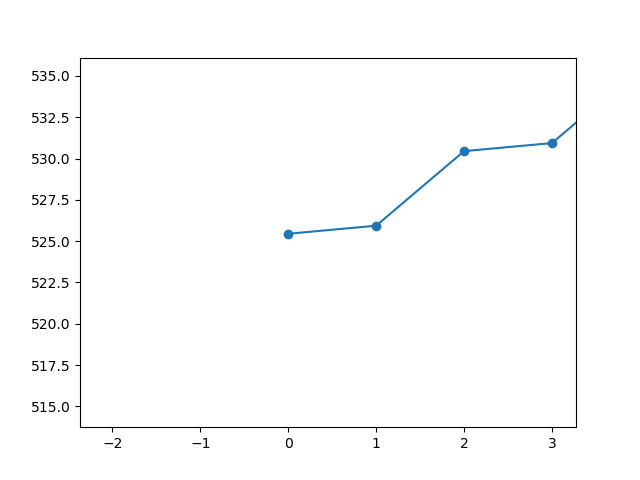

In [40]:
plt.plot((timestamps_on[:1600]),'o-')
plt.show()

In [41]:
timestamps_mov = timestamps_on[:1600]
np.save(os.path.join(working_directory,'timestamps_mov.npy'), timestamps_mov)

In [ ]:
plt.plot(np.diff(np.load(os.path.join(working_directory,'timestamps_V.npy'))))
plt.show()

In [ ]:
def clean_up(working_directory,timestamps, fail = None):
    if fail != None:
        timestamps = np.delete(timestamps, [fail])
    
    wd_tmp = os.path.join(working_directory,'NationalInstruments')
    
    data_dir = [f for f in os.listdir(wd_tmp) if 'sweepParameter' in f]
    #print(data_dir)
    count = 0

    for i in data_dir:
        if 'sweepParameter' in i:
            count += 1
        else:
            count = count
    print(count)
    trials = []
    ids = []
    ts_dict = {}
    count = 1
    for i in range(count):

        path_tmp = os.path.join(wd_tmp,data_dir[i])
        metaData_tmp = pd.read_pickle(path_tmp)
        trials.append(len(metaData_tmp)*2)
        print(sum(trials))
        ids.append(data_dir[i][:3])
        print(ids)
    if timestamps.shape[0] != sum(trials):
        print('Corrupted timestamps....')

        plt.plot(np.diff(timestamps),'o-')
        #plt.plot((timestamps-timestamps[0]),'o-')
        plt.show()

       
    else:

        for i in range(count):
            ts_dict[ids[i]] = timestamps[:trials[i]]
            timestamps = np.delete(timestamps, [range(trials[i])])    
    return timestamps,ts_dict

## for deleting timestamps use ts+1 // ts = first wrong ts


In [ ]:
#timestamps_off,ts_dict_off = clean_up(working_directory,timestamps_off,fail = 404)
timestamps_on,ts_dict_on = clean_up(working_directory,timestamps_on,fail = 29)


In [ ]:
ids = list(ts_dict_on.keys())

In [ ]:
wd_tmp = os.path.join(working_directory,'NationalInstruments')
    
data_dir = [f for f in os.listdir(wd_tmp) if not '.npy'  in f]
    #print(data_dir)
count = 0

for i in data_dir:
    if 'sweepParameter' in i:
        count += 1
    else:
        count = count

In [ ]:
count

In [ ]:
sweepParameters_path = []
inputData_path = []
[sweepParameters_path.append(os.path.join(wd_tmp,data_dir[i])) for i in range(len(data_dir)) if 'sweepParameter' in data_dir[i]]
[inputData_path.append(os.path.join(wd_tmp,data_dir[i],'temp_AI.npy')) for i in range(len(data_dir)) if 'AI_files_' in data_dir[i]]
    

In [ ]:
sweepParameters_path

In [ ]:
inputData_path

In [ ]:
metaData = pd.read_pickle(sweepParameters_path[0])
metaData

In [ ]:
for i in range(1):
    metaData = pd.read_pickle(sweepParameters_path[i])
    
    pre = metaData['Pre Stimulus Time'][0]
    post = metaData['Sweeplength'][0] - pre
    repetion = metaData['Repititions'][0]
    sweepIDs = np.unique(metaData['sweepID'])
    sweeplength = metaData['Sweeplength'][0]
    
    
        
    input_Data = np.load(inputData_path[i])
    
    #bodytemp = input_Data[1,:,:]
    #feedback_force = input_Data[2,:,:]
    #feedback = input_Data[0,:,:]
    bodytemp = input_Data[0,:,:]
    feedback_force = input_Data[1,:,:]
    feedback_3 = input_Data[2,:,:]
    feedback_4 = input_Data[3,:,:]
    feedback_5 = input_Data[4,:,:]
    feedback_1 = input_Data[5,:,:]
    feedback_2 = input_Data[6,:,:]
     
    
    
    ts_sweepstart = ts_dict_on[ids[i]][::2]
    #ts_sweepstart = ts_sweepstart -1
    ts_stimstart = ts_dict_on[ids[i]][1::2]
    #ts_stimstart = ts_stimstart -4
    
    
    Data = {}
    Data['Sweepstart'] = {}
    Data['Stimstart'] = {}
    Data['Feedback_3'] = {}
    Data['Feedback_4'] = {}
    Data['Feedback_Force'] = {}

    for ii in range(len(sweepIDs)):
        Data['Sweepstart']['{0:02d}'.format(ii)] = ts_sweepstart[metaData['sweepID'] == float(ii)]
        Data['Stimstart']['{0:02d}'.format(ii)] = ts_stimstart[metaData['sweepID'] == float(ii)]
        
        Data['Feedback_3']['{0:02d}'.format(ii)] = feedback_3[:,np.where(metaData['sweepID'] == float(ii))]
        Data['Feedback_4']['{0:02d}'.format(ii)] = feedback_4[:,np.where(metaData['sweepID'] == float(ii))]
        Data['Feedback_Force']['{0:02d}'.format(ii)] = feedback_force[:,np.where(metaData['sweepID'] == float(ii))]
        stimData = pd.DataFrame.from_dict(Data,orient = 'columns')
    stimData.to_pickle(wd_tmp+'/'+ids[i]+'_stimData_probe2.pkl')

In [ ]:
stimData

In [ ]:
ts_stimstart - ts_sweepstart

In [ ]:
stimData["Feedback_3"]["00"][:,:,:].shape

In [ ]:
% matplotlib inline

for i in range(11)[:]:
    #plt.plot(stimData["Feedback_3"]["0_feedback"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["1_feedback"][:,0,i])
    plt.plot(stimData["Feedback_3"]["{0:02d}".format(i)][:,0,:])
    #plt.plot(stimData["Feedback_3"]["03"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["04"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["5_feedback"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["6_feedback"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["7_feedback"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["8_feedback"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["9_feedback"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["10_feedback"][:,0,i])
    #plt.plot(stimData["Feedback_3"]["11_feedback"][:,0,i])
    
    plt.show()